In [62]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

In [63]:

df = pd.read_csv("../data/extracted_data.csv")
df.head()

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,1958,1,1
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,566,1,1
2,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,4918,3,1
3,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,5088,1,1
4,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,4004,1,1


In [64]:
df['title_length'] = df.apply(lambda row: len(row['title']), axis=1)
df['tags_count'] = df.apply(lambda row: len(row['tags'].split('|')), axis=1)
df.head()

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded,title_length,tags_count
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,1958,1,1,34,15
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,566,1,1,60,25
2,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,4918,3,1,53,30
3,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,5088,1,1,56,23
4,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,4004,1,1,55,33


In [65]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded,title_length,tags_count
count,245987.000000,2.459870e+05,2.459870e+05,245987.000000,2.459870e+05,245987.000000,245987.000000,245987.000000,245987.000000,245987.000000
mean,18.727221,2.656137e+06,1.311227e+05,1239.411209,1.037797e+04,3158.059723,0.821755,4.072138,50.324216,16.304841
std,6.779700,8.340805e+06,4.433037e+05,8404.223869,7.532480e+04,1743.693531,0.914576,2.454605,20.445713,12.585204
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.000000,-1.000000,0.000000,1.000000,1.000000
25%,17.000000,4.729600e+05,1.804900e+04,0.000000,1.293000e+03,1794.000000,0.000000,2.000000,36.000000,5.000000
50%,20.000000,9.424540e+05,4.079600e+04,0.000000,2.801000e+03,3061.000000,1.000000,4.000000,47.000000,15.000000
75%,24.000000,2.117553e+06,1.005080e+05,567.000000,6.519000e+03,4507.000000,1.000000,5.000000,63.000000,25.000000
max,29.000000,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06,19332.000000,3.000000,37.000000,100.000000,77.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245987 entries, 0 to 245986
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   title             245987 non-null  object
 1   channelTitle      245987 non-null  object
 2   categoryId        245987 non-null  int64 
 3   tags              245987 non-null  object
 4   view_count        245987 non-null  int64 
 5   likes             245987 non-null  int64 
 6   dislikes          245987 non-null  int64 
 7   comment_count     245987 non-null  int64 
 8   channel_age       245987 non-null  int64 
 9   image_popularity  245987 non-null  int64 
 10  days_uploaded     245987 non-null  int64 
 11  title_length      245987 non-null  int64 
 12  tags_count        245987 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 24.4+ MB


In [67]:
df.nunique()

title                45223
channelTitle          8221
categoryId              15
tags                 30929
view_count          234651
likes               130808
dislikes             13179
comment_count        34423
channel_age           6754
image_popularity         5
days_uploaded           38
title_length           100
tags_count              77
dtype: int64

In [68]:
df[df['view_count'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 15289 to 201188
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             76 non-null     object
 1   channelTitle      76 non-null     object
 2   categoryId        76 non-null     int64 
 3   tags              76 non-null     object
 4   view_count        76 non-null     int64 
 5   likes             76 non-null     int64 
 6   dislikes          76 non-null     int64 
 7   comment_count     76 non-null     int64 
 8   channel_age       76 non-null     int64 
 9   image_popularity  76 non-null     int64 
 10  days_uploaded     76 non-null     int64 
 11  title_length      76 non-null     int64 
 12  tags_count        76 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 8.3+ KB


#### 76 redova kojima nedostaje vrednost za view_count

In [69]:
df[df['likes'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 1224 to 244967
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             1466 non-null   object
 1   channelTitle      1466 non-null   object
 2   categoryId        1466 non-null   int64 
 3   tags              1466 non-null   object
 4   view_count        1466 non-null   int64 
 5   likes             1466 non-null   int64 
 6   dislikes          1466 non-null   int64 
 7   comment_count     1466 non-null   int64 
 8   channel_age       1466 non-null   int64 
 9   image_popularity  1466 non-null   int64 
 10  days_uploaded     1466 non-null   int64 
 11  title_length      1466 non-null   int64 
 12  tags_count        1466 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 160.3+ KB


#### 1446 redova kojima nedostaje vrednost za likes

In [70]:
df[df['dislikes'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147916 entries, 1224 to 245986
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   title             147916 non-null  object
 1   channelTitle      147916 non-null  object
 2   categoryId        147916 non-null  int64 
 3   tags              147916 non-null  object
 4   view_count        147916 non-null  int64 
 5   likes             147916 non-null  int64 
 6   dislikes          147916 non-null  int64 
 7   comment_count     147916 non-null  int64 
 8   channel_age       147916 non-null  int64 
 9   image_popularity  147916 non-null  int64 
 10  days_uploaded     147916 non-null  int64 
 11  title_length      147916 non-null  int64 
 12  tags_count        147916 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 15.8+ MB


#### 147916 redova kojima nedostaje vrednost za dislikes

In [71]:
df[df['channel_age'] == -1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 183 to 200578
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             575 non-null    object
 1   channelTitle      575 non-null    object
 2   categoryId        575 non-null    int64 
 3   tags              575 non-null    object
 4   view_count        575 non-null    int64 
 5   likes             575 non-null    int64 
 6   dislikes          575 non-null    int64 
 7   comment_count     575 non-null    int64 
 8   channel_age       575 non-null    int64 
 9   image_popularity  575 non-null    int64 
 10  days_uploaded     575 non-null    int64 
 11  title_length      575 non-null    int64 
 12  tags_count        575 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 62.9+ KB


#### 575 redova kojima nedostaje vrednost za channel_age

In [72]:
df[df['image_popularity'] == -1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6488 entries, 26 to 245847
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             6488 non-null   object
 1   channelTitle      6488 non-null   object
 2   categoryId        6488 non-null   int64 
 3   tags              6488 non-null   object
 4   view_count        6488 non-null   int64 
 5   likes             6488 non-null   int64 
 6   dislikes          6488 non-null   int64 
 7   comment_count     6488 non-null   int64 
 8   channel_age       6488 non-null   int64 
 9   image_popularity  6488 non-null   int64 
 10  days_uploaded     6488 non-null   int64 
 11  title_length      6488 non-null   int64 
 12  tags_count        6488 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 709.6+ KB


#### 6488 redova kojima nedostaje vrednost za image_popularity

In [73]:
columns_to_delete = ['title_length', 'tags_count']

for column in columns_to_delete : 
    df.drop(column, axis='columns', inplace=True)
    
df.head()

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,1958,1,1
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,566,1,1
2,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,4918,3,1
3,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,5088,1,1
4,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,4004,1,1


In [74]:
df1 = df.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245904 entries, 0 to 245986
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   title             245904 non-null  object
 1   channelTitle      245904 non-null  object
 2   categoryId        245904 non-null  int64 
 3   tags              245904 non-null  object
 4   view_count        245904 non-null  int64 
 5   likes             245904 non-null  int64 
 6   dislikes          245904 non-null  int64 
 7   comment_count     245904 non-null  int64 
 8   channel_age       245904 non-null  int64 
 9   image_popularity  245904 non-null  int64 
 10  days_uploaded     245904 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 22.5+ MB


#### Skup podatak sadrzi 83 duplikat vrednosti.

In [75]:
numeric_features = ['view_count', 'dislikes', 'comment_count', 'channel_age', 'days_uploaded']
categorical_features = ['categoryId', 'image_popularity']
target = "likes"
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['view_count', 'dislikes', 'comment_count', 'channel_age', 'days_uploaded']

categorical_features:
['categoryId', 'image_popularity']

target:
likes


In [76]:
for i in categorical_features:
    print(f'{i}\n{np.round((df[i].value_counts() / df[i].value_counts().sum()) * 100,2)}')

categoryId
24    19.99
20    19.88
10    16.39
17    11.57
22     8.44
23     4.98
1      4.04
25     3.54
28     3.02
26     2.60
27     2.46
2      1.99
19     0.60
15     0.45
29     0.05
Name: categoryId, dtype: float64
image_popularity
 1    39.04
 0    38.43
 2    13.91
 3     5.98
-1     2.64
Name: image_popularity, dtype: float64


#### Najcesce se pojavljuju video snimci sa kategorijama 24, 20 i 10, sto predstavlja kategorija Entertainment, Gaming i Music u tom redosledu.
#### Sto se tice kategorije kojoj pripada slika, najvise snimaka ima semi popularnu sliku, zatim slede popularne, pa nepopularne, dok najmanje snimaka ima veoma popularnu sliku

In [77]:
df['log_view_count'] = df.apply(lambda row: np.log2(row['view_count']) if row['view_count'] != 0 else row['view_count'], axis=1)
df['log_dislikes'] = df.apply(lambda row: np.log2(row['dislikes']) if row['dislikes'] != 0 else row['dislikes'], axis=1)
df['log_comment_count'] = df.apply(lambda row: np.log2(row['comment_count']) if row['comment_count'] != 0 else row['comment_count'], axis=1)
df['log_likes'] = df.apply(lambda row: np.log2(row['likes']) if row['likes'] != 0 else row['likes'], axis=1)
df

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded,log_view_count,log_dislikes,log_comment_count,log_likes
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,1958,1,1,20.530519,12.515453,15.107912,17.259559
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,566,1,1,21.183553,11.448116,14.014456,17.162893
2,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,4918,3,1,20.959326,11.359750,15.295661,18.432522
3,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,5088,1,1,18.922221,10.857981,12.900678,14.505005
4,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,4004,1,1,20.100068,9.912889,11.100662,15.483123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245982,Im getting rid of everything I own,SomeThingElseYT,23,Im getting rid of everything I own|Animation|A...,563422,68917,0,1822,3634,1,7,19.103856,0.000000,10.831307,16.072572
245983,IShowSpeed vs. KSI - Official Livestream,IShowSpeed,20,ishowspeed|speed|ksi|fight,2440589,114121,0,5828,2833,1,7,21.218798,0.000000,12.508785,16.800205
245984,🚨 BELLINGHAM'S UNREAL! 🚨 Villarreal vs. Real M...,ESPN FC,17,Real Madrid vs Villarreal|Jude Bellingham|Rodr...,474333,5730,0,343,2027,2,6,18.855541,0.000000,8.422065,12.484319
245985,Marvel Studios' Echo | Rampage | Disney+ & Hulu,Marvel Entertainment,24,marvel|comics,804338,29540,0,1972,6764,1,6,19.617442,0.000000,10.945444,14.850382


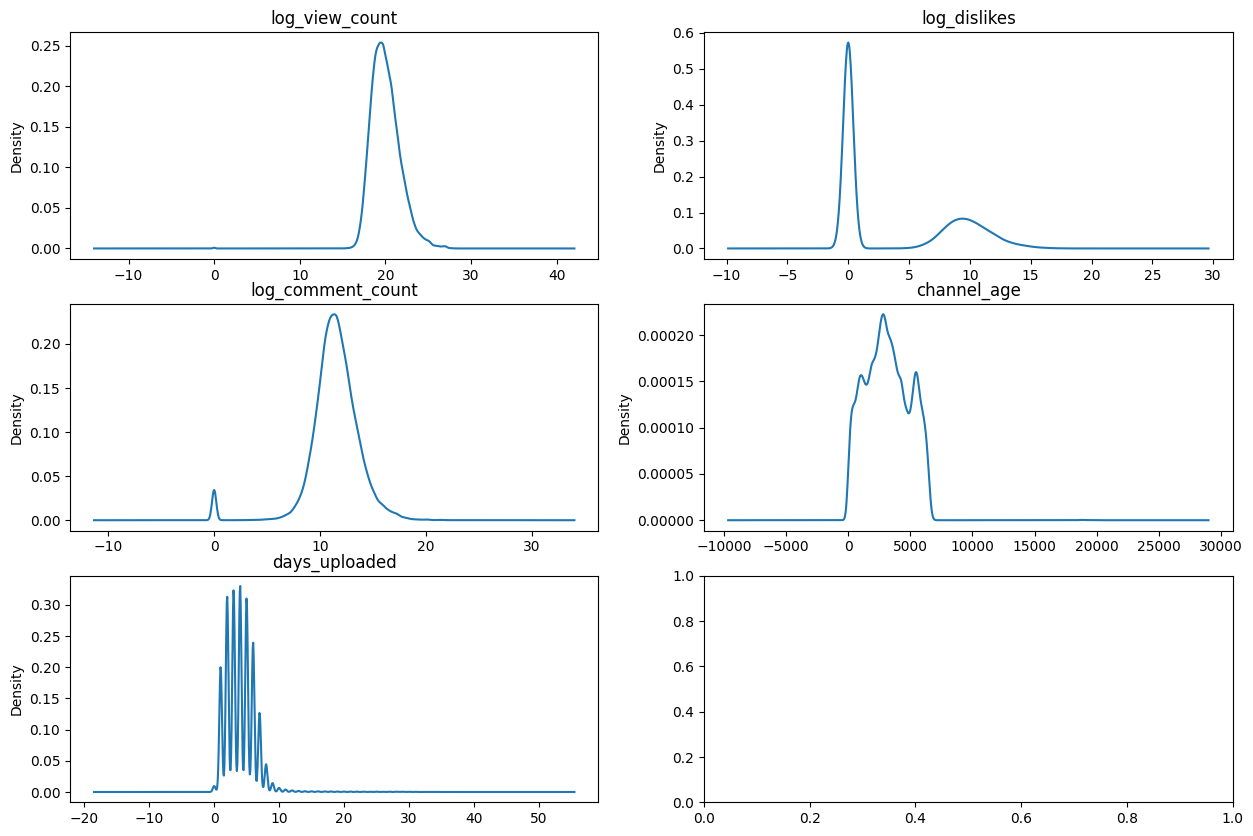

In [78]:
log_numeric_features = ['log_view_count', 'log_dislikes', 'log_comment_count', 'channel_age', 'days_uploaded']

fig,ax = plt.subplots(3,2,figsize=(15,10))
row = col = 0
for n,i in enumerate(log_numeric_features):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

In [79]:
for i in numeric_features:
    print(f'{i}: {"Not Gaussian" if normaltest(df[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(df[i].values)}')

view_count: Not Gaussian  NormaltestResult(statistic=426119.0338390607, pvalue=0.0)
dislikes: Not Gaussian  NormaltestResult(statistic=762464.6591132695, pvalue=0.0)
comment_count: Not Gaussian  NormaltestResult(statistic=719794.7124648655, pvalue=0.0)
channel_age: Not Gaussian  NormaltestResult(statistic=4783.037754608738, pvalue=0.0)
days_uploaded: Not Gaussian  NormaltestResult(statistic=178115.8107108625, pvalue=0.0)


In [80]:
for i in numeric_features:
    print(f'{i}: {np.abs(np.round((df[i].std()/df[i].median()) * 100,2))}')

view_count: 885.01
dislikes: inf
comment_count: 2689.21
channel_age: 56.96
days_uploaded: 61.37


C:\Users\pc\AppData\Local\Temp\ipykernel_5220\1784928176.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'{i}: {np.abs(np.round((df[i].std()/df[i].median()) * 100,2))}')


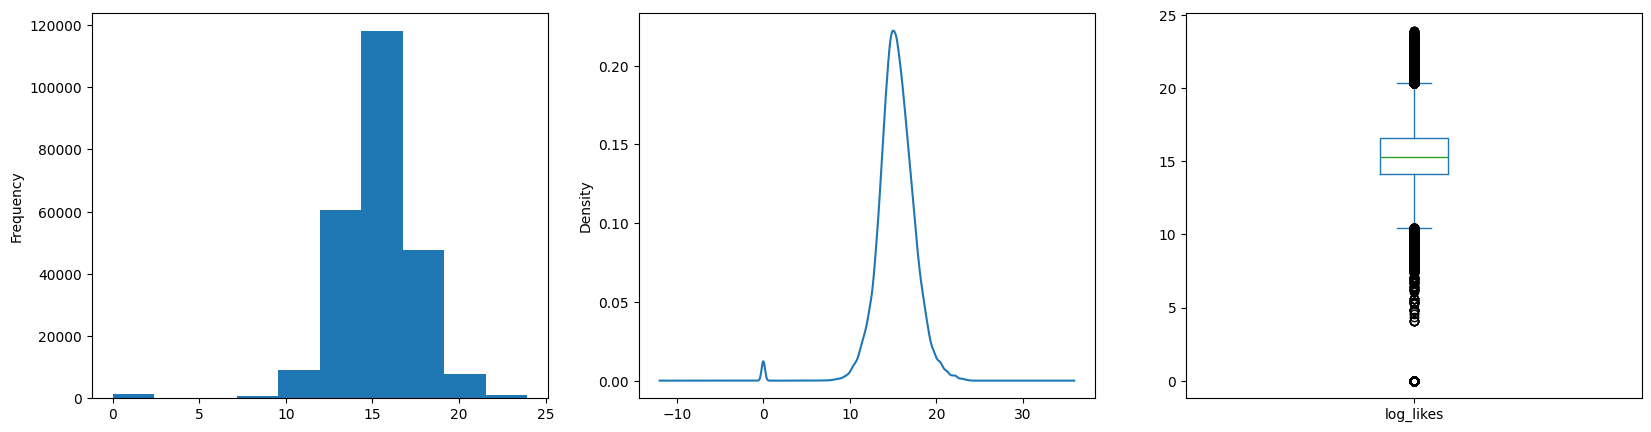

In [81]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
df['log_likes'].plot(kind="hist",ax=ax[0])
df['log_likes'].plot(kind="kde",ax=ax[1])
df['log_likes'].plot(kind="box",ax=ax[2])
plt.show()

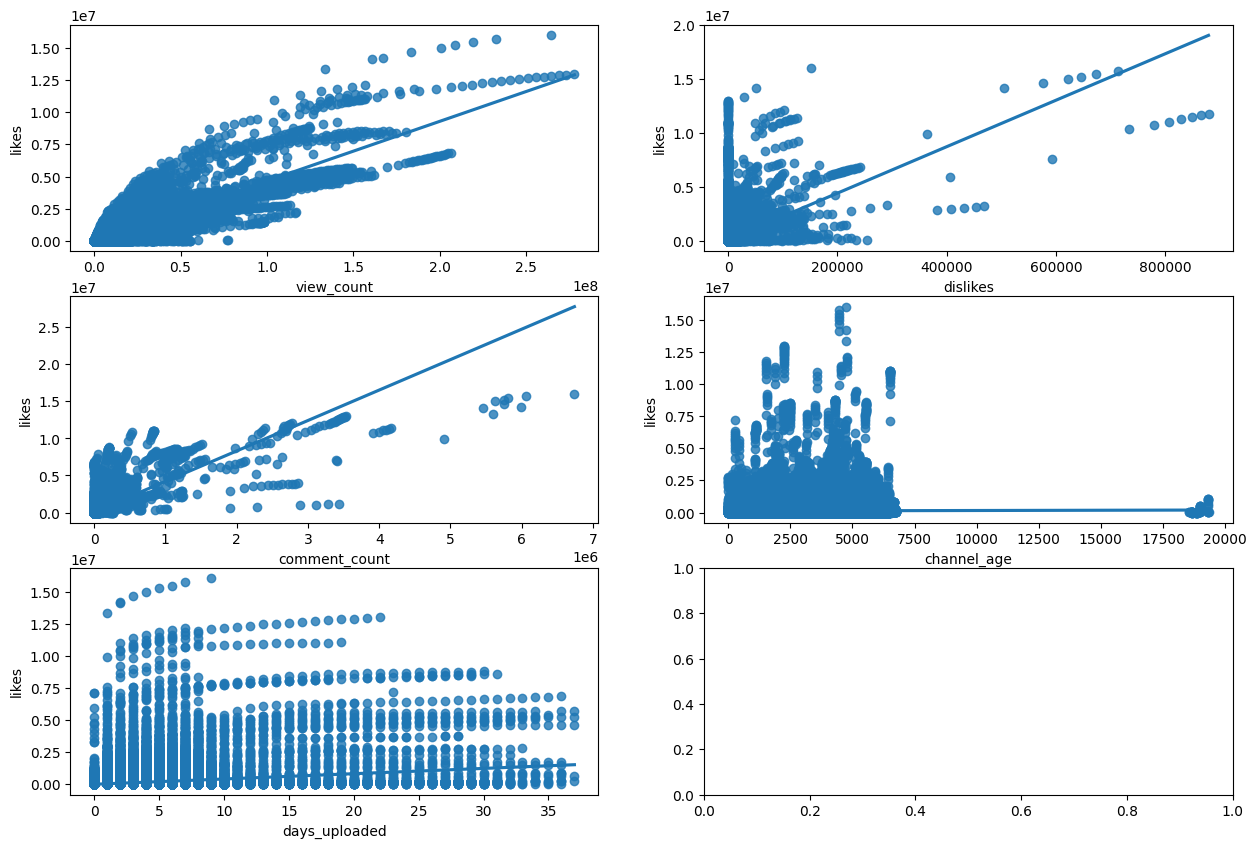

In [48]:
fig,ax = plt.subplots(3,2,figsize=(15,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sb.regplot(x=i,y="likes",data=df,ax=ax[row,col],ci=False)
    col += 1

<Axes: xlabel='categoryId', ylabel='likes'>

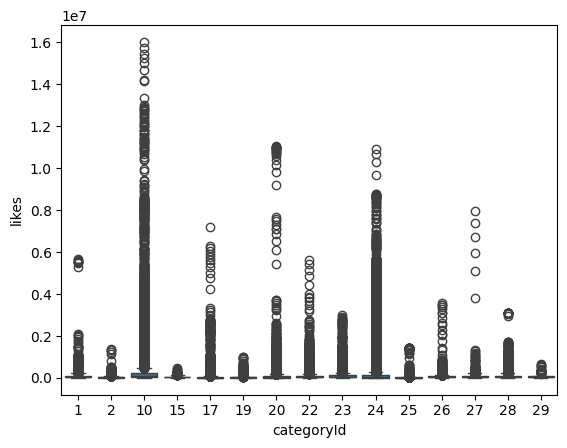

In [82]:
sb.boxplot(x=df[categorical_features[0]],y=df[target])

<Axes: xlabel='image_popularity', ylabel='likes'>

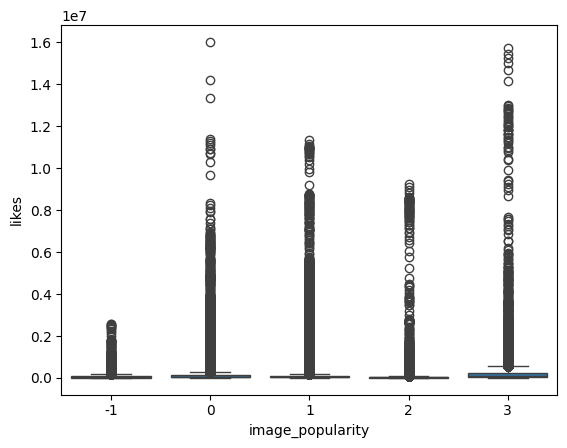

In [83]:
sb.boxplot(x=df[categorical_features[1]],y=df[target])

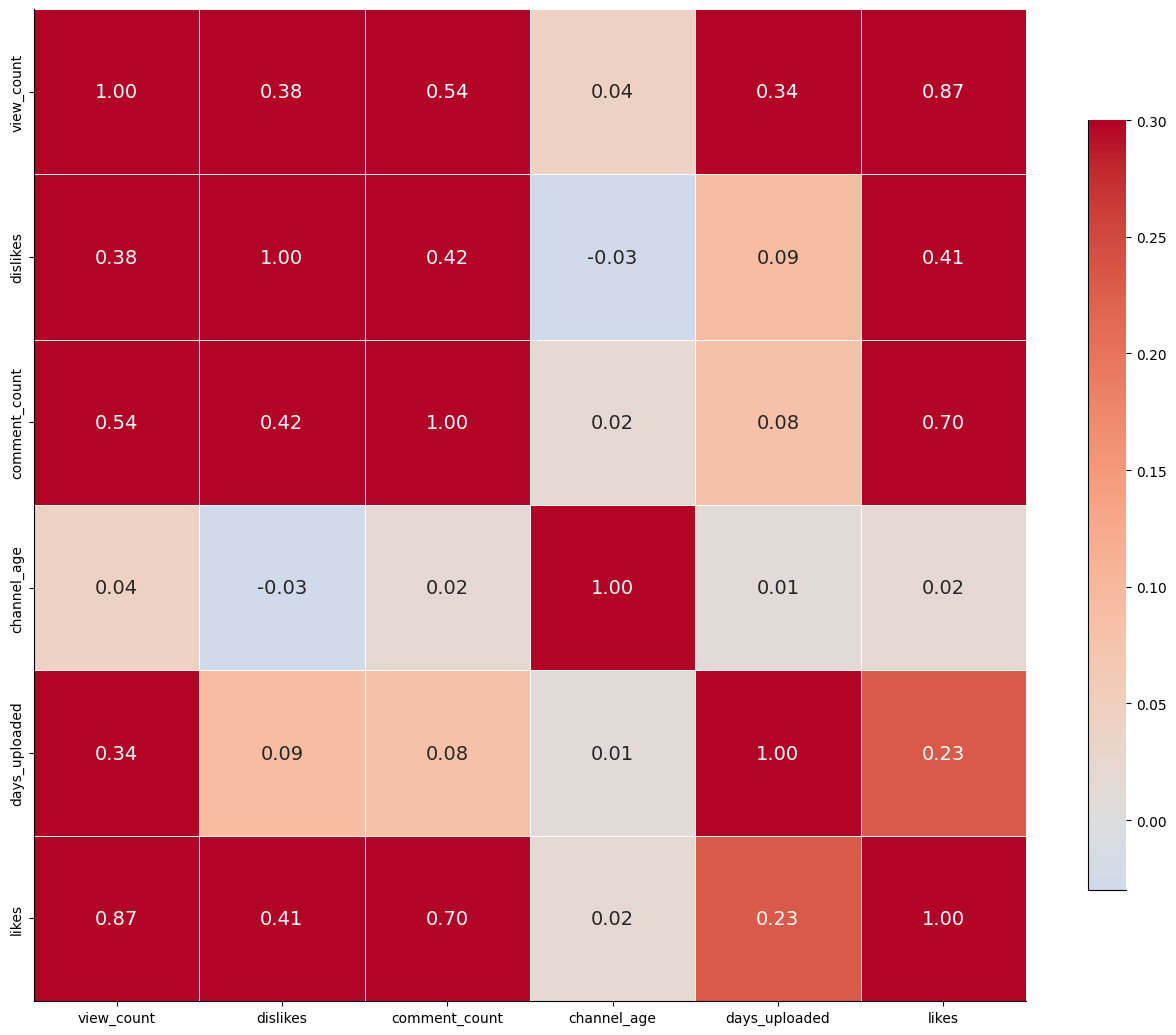

In [84]:
num_columns = numeric_features.copy() 
num_columns.append('likes')

corr = df[num_columns].corr().round(2)

plt.figure(figsize=(16, 20))
g = sb.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"fontsize":14})
sb.despine()

plt.show()

#### Starost kanala channel_age je u slaboj korelaciji sa brojem lajkova koje video ima